Представьте, что вы работаете аналитиком в компании, которая занимается арендой велосипедов. Коллега из офиса в Лондоне прислал вам данные за два года: с 4 января 2015 по 3 января 2017. Вам предстоит изучить динамику числа аренд, наличие связи с погодными условиями и выходными, а также объяснить несколько аномалий на графике.

## Задание
<ol>
<li>Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.</li>
<li>Постройте график по числу поездок по дате и времени.</li>
<li>Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.</li>
<li>Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.</li>
<li>Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдите стандартное отклонение.</li>
<li>Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм.</li>
<li>Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим. Найдите причину данной аномалии.</li>
<li>Изучите аномально низкие значения, найдите день с наименьшим числом аренд. Найдите причину данной аномалии.</li>
</ol>
    
#### Описание данных
* timestamp – дата и время (точность до часа)
* cnt – количество аренд велосипедов за этот час
* t1 – температура, в С
* t2 – температура "ощущается как", в С 
* hum – влажность (%)
* wind_speed – скорость ветра, км/ч
* weather_code – погодные условия:
<br>1 – ясно (SKC)
<br>2 – преимущественно ясно / встречаются отдельные облака (SCT)
<br>3 – облачно / значительные облака (BKN)
<br>4 – пасмурно (OVC)
<br>7 – небольшой дождь Rain/ light Rain shower/ Light rain 
<br>10 – дождь с грозой
<br>26 – снегопад 
<br>94 – ледяной туман (да, такое бывает!)
* isholiday – является ли день праздником (1 – праздник, 0 – нет)
* isweekend –  является ли день выходным (1 – выходной, 0 – нет)
* season – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)

In [1]:
# Import libraries and data
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime

In [2]:
sns.set(
     font_scale=2,
     style="whitegrid",
     rc={'figure.figsize':(20,7)}
         )

In [3]:
df = pd.read_csv('london.csv')
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
# Change the data type for the timestamp column and set it as an index.

In [6]:
df.timestamp = pd.to_datetime(df.timestamp, format='%Y-%m-%d %H:%M:%S')

In [7]:
df.set_index('timestamp', inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.3 MB


<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

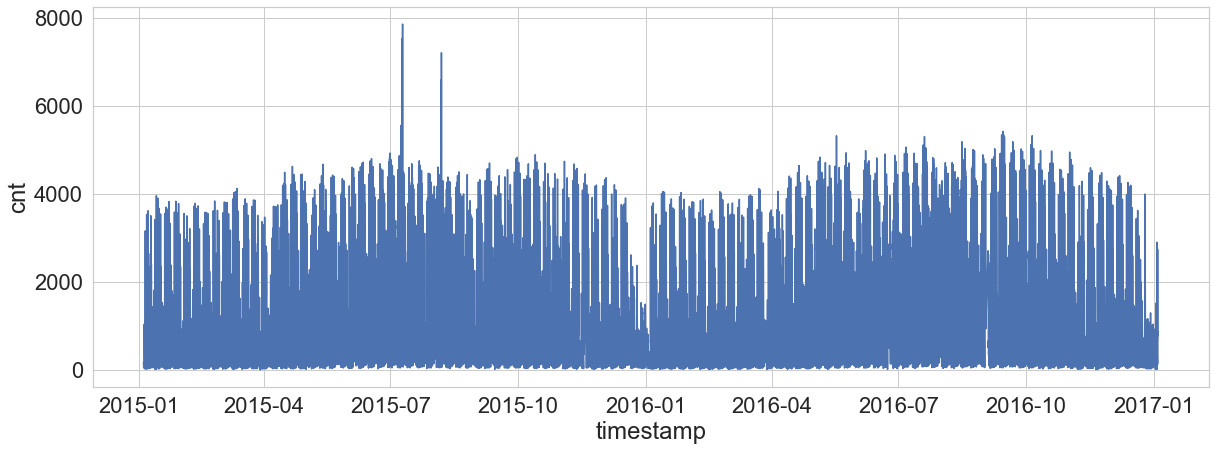

In [9]:
# Let's build a graph of the number of trips by date and time.
sns.lineplot(x=df.index, y=df.cnt)

In [10]:
# Transform the data and build a graph of the number of trips by date.
agg_by_day = df.resample(rule='D').agg({'cnt':'sum'})
agg_by_day

,cnt
timestamp,
2015-01-04,9234
2015-01-05,20372
2015-01-06,20613
2015-01-07,21064
2015-01-08,15601
...,...
2016-12-30,11566
2016-12-31,11424
2017-01-01,6421


<AxesSubplot:xlabel='timestamp'>

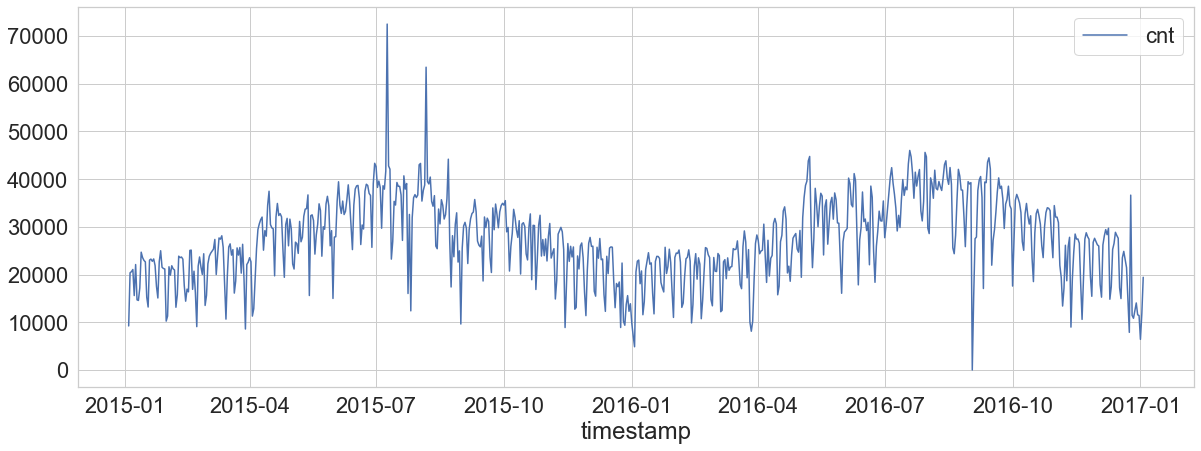

In [11]:
sns.lineplot(data=agg_by_day)

In [12]:
# Let's calculate the moving average with a window equal to 3.
rolling_avg = agg_by_day.rolling(3).mean()
rolling_avg

,cnt
timestamp,
2015-01-04,NaN
2015-01-05,NaN
2015-01-06,16739.666667
2015-01-07,20683.000000
2015-01-08,19092.666667
...,...
2016-12-30,12682.000000
2016-12-31,12347.333333
2017-01-01,9803.666667


In [13]:
rolling_avg.loc['2015-07-09']

cnt    50705.0
Name: 2015-07-09 00:00:00, dtype: float64

In [14]:
# Calculate the standard deviation of the difference between the observed and calculated values.
std = np.std(agg_by_day - rolling_avg)
std.round(2)

cnt    4558.59
dtype: float64

In [15]:
# Calculate the upper and lower bounds of the 99% confidence interval.

In [16]:
rolling_avg['upper_bound'] = rolling_avg[['cnt']] + 2.576 * std
rolling_avg

,cnt,upper_bound
timestamp,,
2015-01-04,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,16739.666667,28482.585854
2015-01-07,20683.000000,32425.919188
2015-01-08,19092.666667,30835.585854
...,...,...
2016-12-30,12682.000000,24424.919188
2016-12-31,12347.333333,24090.252521
2017-01-01,9803.666667,21546.585854


In [17]:
rolling_avg['lower_bound'] = rolling_avg[['cnt']] - 2.576 * std
rolling_avg

,cnt,upper_bound,lower_bound
timestamp,,,
2015-01-04,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN
2015-01-06,16739.666667,28482.585854,4996.747479
2015-01-07,20683.000000,32425.919188,8940.080812
2015-01-08,19092.666667,30835.585854,7349.747479
...,...,...,...
2016-12-30,12682.000000,24424.919188,939.080812
2016-12-31,12347.333333,24090.252521,604.414146
2017-01-01,9803.666667,21546.585854,-1939.252521


In [18]:
# Find abnormally high values (outside the 99% confidence interval).

In [19]:
agg_by_day.query('cnt > @rolling_avg.upper_bound')

,cnt
timestamp,
2015-07-09,72504
2015-08-06,63468
2016-09-04,27512
2016-12-25,36653


The high value of July 9, 2015, is due to the strike of the subway employees.

In [20]:
# Find abnormally low values (outside the 99% confidence interval).

In [21]:
agg_by_day.query('cnt < @rolling_avg.lower_bound')

,cnt
timestamp,
2015-05-14,15609
2015-07-12,23240
2015-07-24,16034
2015-08-24,17400
2015-11-14,8898
2016-09-02,0
2016-09-10,17080
2016-09-16,21967
2016-11-12,8990


In [22]:
df.resample(rule='D').agg({'wind_speed':'mean',
                           'weather_code':'count'}).loc['2016-08-15':'2016-09-15']

,wind_speed,weather_code
timestamp,,
2016-08-15,14.695652,23
2016-08-16,14.045455,22
2016-08-17,12.270833,24
2016-08-18,13.250000,24
2016-08-19,12.541667,24
2016-08-20,26.229167,24
2016-08-21,26.291667,24
2016-08-22,20.312500,24
2016-08-23,10.291667,24


Let's analyze the value 0 for 2 September 2016. Wind speed and weather data are missing or equal to 0. Most likely, there was an error in data collection.